In [1]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors

import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)


In [4]:
import json

with open('../data/experiment_embedding_data_tif.json', 'r') as json_file:
    Embedding_dict = json.load(json_file)

with open('../data/experiment_embedding_data_tif2.json', 'r') as json_file:
    Embedding_dict2 = json.load(json_file)

with open('../data/experiment_embedding_data_tif3.json', 'r') as json_file:
    Embedding_dict3 = json.load(json_file)


In [13]:
# Convert to DataFrame
rows = []
for key, tensor in Embedding_dict.items():
    rows.append([key] + tensor + Embedding_dict2[key] + Embedding_dict3[key])

df = pd.DataFrame(rows, columns=['ID'] + [f'Feature_{i}' for i in range(len(rows[0]) - 1)])
df.index = df.ID
df = df.drop(columns='ID')

In [14]:
df

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
ID                                                                           
10        -0.021335  -0.013414   0.028274  -0.018928   0.002177  -0.022188   
101       -0.033433   0.018339   0.043779  -0.041619   0.003271  -0.023390   
102       -0.018769  -0.005845   0.042768  -0.008416   0.038997   0.005830   
100       -0.017582  -0.017115   0.043735  -0.040311  -0.023232  -0.010719   
1         -0.011030  -0.007739   0.042919  -0.027277   0.006690  -0.007591   
...             ...        ...        ...        ...        ...        ...   
92        -0.031930   0.028284   0.000982  -0.037429  -0.024106   0.008230   
Vehicle   -0.021855   0.024133   0.012798   0.011910  -0.045756  -0.040106   
98        -0.020499  -0.016662   0.044530  -0.039449   0.008262  -0.023838   
99        -0.027905  -0.006304   0.026490  -0.025693   0.014135  -0.016415   
Positive  -0.042615  -0.001707   0.018846  -0.035546  -0.003630  -0.029875   

          Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
ID                                                                             
10         0.067257  -0.032695   0.003252  -0.025087   -0.049239   -0.019719   
101        0.058705  -0.025404   0.002199  -0.037136   -0.054980    0.010031   
102        0.065884  -0.027345   0.009835  -0.028075   -0.053477   -0.019611   
100        0.066973   0.000630  -0.004073  -0.031993   -0.041779   -0.034921   
1          0.067684   0.021423   0.005106   0.007570   -0.051221   -0.019949   
...             ...        ...        ...        ...         ...         ...   
92         0.040775  -0.045936   0.011281  -0.027278   -0.028459    0.026039   
Vehicle    0.046934  -0.027393   0.028394  -0.043492   -0.027177    0.023806   
98         0.065146   0.001457  -0.010650  -0.006862   -0.044089   -0.030587   
99         0.066287  -0.030502   0.031335  -0.028327   -0.039945   -0.003177   
Positive   0.055841  -0.007742  -0.019113  -0.029780   -0.038059   -0.005046   

          Feature_12  Feature_13  Feature_14  Feature_15  Feature_16  \
ID                                                                     
10          0.003376   -0.011867   -0.023564   -0.016664    0.005374   
101         0.032017   -0.018507   -0.011818   -0.006261    0.010507   
102         0.003616   -0.020009   -0.011558   -0.024119   -0.005123   
100         0.008038    0.014000    0.020641   -0.025720    0.020389   
1          -0.027438    0.025854   -0.024634   -0.039958   -0.014403   
...              ...         ...         ...         ...         ...   
92          0.037281   -0.036533   -0.005087    0.011279   -0.033341   
Vehicle     0.016381   -0.015983   -0.047699   -0.028970   -0.009826   
98          0.002997    0.021969    0.004911   -0.002643    0.008125   
99         -0.016340    0.008824   -0.000906   -0.004590   -0.024124   
Positive    0.037245    0.013374    0.007287    0.018205    0.003422   

          Feature_17  Feature_18  Feature_19  Feature_20  Feature_21  \
ID                                                                     
10         -0.043317   -0.033796    0.040154    0.021153   -0.011207   
101        -0.060094   -0.029344    0.026254    0.016332    0.014874   
102        -0.048515   -0.020579    0.036796    0.004330   -0.020398   
100        -0.049128   -0.041566    0.028010    0.047826   -0.008089   
1          -0.049205   -0.055112    0.050322    0.039520    0.006873   
...              ...         ...         ...         ...         ...   
92         -0.037340   -0.004553    0.035565    0.000358    0.004223   
Vehicle    -0.045159   -0.001630    0.004863   -0.026749   -0.002286   
98         -0.042626   -0.047105    0.029838    0.023846    0.000834   
99         -0.049919   -0.022307    0.043633    0.010830   -0.009421   
Positive   -0.048625   -0.044032    0.020935    0.026634    0.009040   

          Feature_22  Feature_23  Feature_24  Feature_25  Feature_26  \
ID      

In [17]:
pos = df.loc[df.index.str.contains('Positive')]
neg = df.loc[df.index.str.contains('Vehicle')]
unknown = df.loc[~df.index.isin(["Positive",'Vehicle'])]
# unknown = df.loc[df.index.isin(["FCCP",'Vehicle','100'])]

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Define the number of nearest points to find
k = 30

# Compute Jaccard distances (note: Jaccard similarity = 1 - Jaccard distance)
similarity = cosine_similarity(pos.values, unknown.values)


# Get the indices of the top k most similar points
top_k_indices = similarity[0].argsort()[-k:][::-1]

nearest_ids = unknown.iloc[top_k_indices].index

In [22]:
nearest_ids[:10]

Index(['98', '86', '101', '100', '111', '89', '104', '76', '102', '120'], dtype='object', name='ID')

# TSNE

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [26]:
compound = pd.read_csv('../data/compound_web_pred.csv')

In [27]:
compound['id'] = compound['name'].map(lambda x: x.split('-')[0])

In [28]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, QED
from collections import OrderedDict
from tqdm import tqdm
from joblib import Parallel, delayed
from rdkit.Chem import QED
from rdkit.Chem import rdFingerprintGenerator
import numpy as np
import joblib


def gen_mogan(m,radius=2):
    try:
        MorganGenerator = rdFingerprintGenerator.GetMorganGenerator(radius=radius,includeChirality=True)
        return list(MorganGenerator.GetFingerprint(m))  
    except:
        return None 



def gen_morgan_feature(mol_list,num_jobs):
    fps = []
    features_map = Parallel(n_jobs=num_jobs, backend="multiprocessing")(
        delayed(gen_mogan)(mol) for mol in tqdm(mol_list)
    )
    for i, feats in enumerate(features_map):
        fps.append(feats)
    fps = np.array(fps)
    return fps


In [29]:
# Convert to DataFrame
rows = gen_morgan_feature(compound['smiles'].map(Chem.MolFromSmiles).values,num_jobs=1)

df = pd.DataFrame(rows, columns=[f'Feature_{i}' for i in range(len(rows[0]) )])
# df.index = df.ID
# df = df.drop(columns='ID')
df.index = compound.id
df

100%|██████████| 135/135 [00:00<00:00, 2287.36it/s]


Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
id                                                                       
88            0          0          0          0          0          0   
119           0          0          0          0          0          0   
113           0          0          0          0          0          0   
86            0          0          0          0          0          1   
55            0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
24            0          0          0          0          0          1   
129           0          0          0          0          0          1   
70            0          1          0          0          0          0   
118           0          0          0          0          0          0   
FCCP          0          0          0          0          0          0   

      Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
id                                                                         
88            0          0          0          0           0           0   
119           0          0          0          0           0           0   
113           0          0          0          0           0           0   
86            0          0          0          0           0           0   
55            0          0          0          0           0           0   
...         ...        ...        ...        ...         ...         ...   
24            0          0          0          0           0           0   
129           0          0          0          0           0           0   
70            0          0          0          0           0           0   
118           0          0          0          0           0           0   
FCCP          0          0          0          0           0           0   

      Feature_12  Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  \
id                                                                             
88             0           0           0           0           0           0   
119            0           0           0           0           0           0   
113            0           0           0           0           0           0   
86             0           0           0           0           0           0   
55             0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
24             0           0           0           0           0           0   
129            0           0           0           0           0           0   
70             0           0           0           0           0           0   
118            0           0           1           0           0           0   
FCCP           0           0           0           0           0           0   

      Feature_18  Feature_19  Feature_20  Feature_21  Feature_22  Feature_23  \
id                                                                             
88             0           0           0           0           0           0   
119            0           0           0           0           0           0   
113            0           0           0           0           0           0   
86             0           0           0           0           0           0   
55             0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
24             0           0           0           0           0           0   
129            0           0           0           0           0           0   
70             0           0           0           0           0           0   
118            0           0           0           0           0           0   
FCCP           0           0           0           0 

In [30]:



from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=40)

combined_data = df.values  
# Fit and transform the data
tsne_results = tsne.fit_transform(combined_data)


In [31]:
final_result = pd.DataFrame(tsne_results,
                            index=df.index
                           )

In [32]:
final_result['label'] = 0
final_result.loc[final_result.index.str.contains('FCCP'),'label'] = 1
final_result.loc[final_result.index.str.contains('Vehicle'),'label'] = 2
final_result.loc[final_result.index.isin(nearest_ids[:5]),'label'] = 3

In [33]:
pos = final_result[final_result['label'] == 1].values
neg = final_result[final_result['label'] == 2].values
select = final_result[final_result['label'] == 3].values
unknown = final_result[final_result['label'] == 0].values

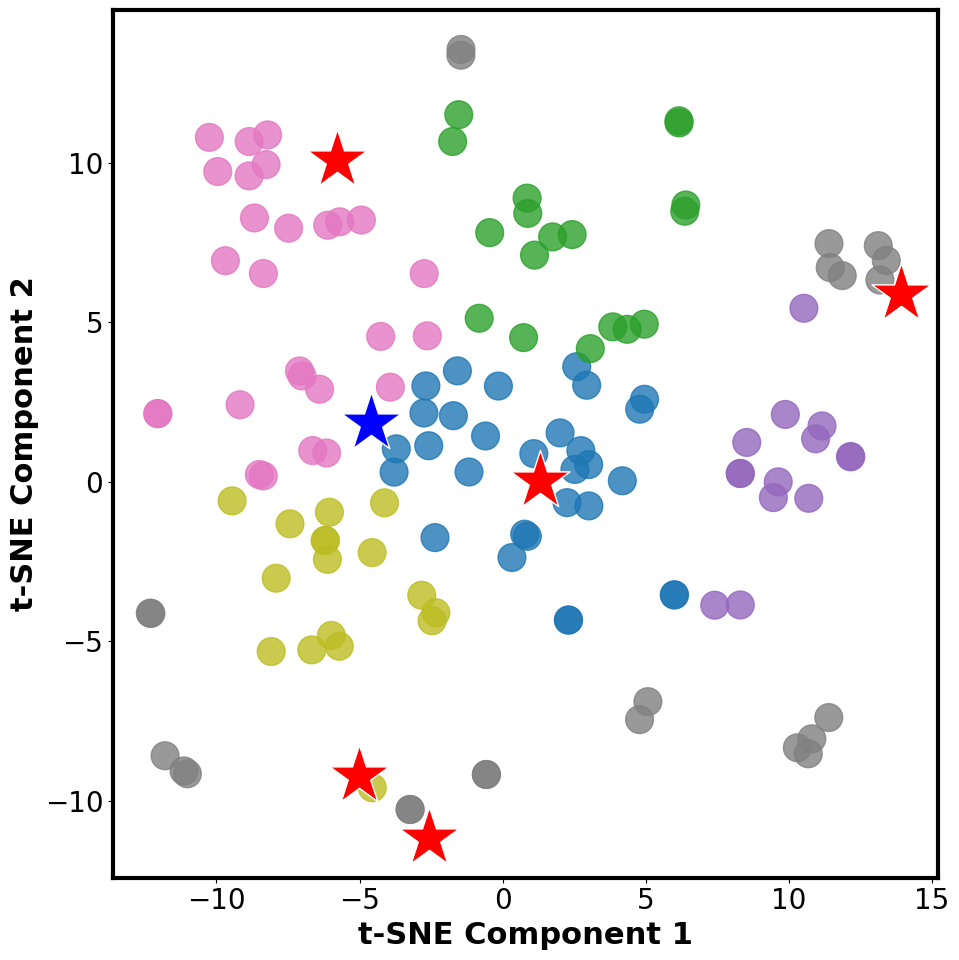

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import to_rgba

# Set font size globally
plt.rcParams['font.size'] = 20  # Increase the font size globally

# Step 1: Perform KMeans clustering on pca_array_2 into 4 clusters
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(unknown)
cluster_centers = kmeans.cluster_centers_  # Cluster centers

# Step 2: Use a high-contrast colormap to generate distinguishable colors
color_map = plt.cm.tab10  # Choose high-contrast colormap
cluster_colors = [to_rgba(color_map(i / k)) for i in range(k)]  # Generate high-contrast colors
threshold_distance = 6  # Points beyond this distance will be colored gray

# Step 3: Calculate the distance from each point in 'unknown' to the cluster centers and set color and size
colors_pca1 = []  # Store the color for each point
sizes_pca1 = []   # Store the size for each point
alpha_pca1 = []   # Store the border width for each point

for point in unknown:
    # Calculate the distance from the current point to each cluster center
    dist_to_centers = np.linalg.norm(cluster_centers - point, axis=1)
    min_distance = np.min(dist_to_centers)  # Get the minimum distance
    closest_cluster = np.argmin(dist_to_centers)  # Find the index of the closest cluster center
    
    # Determine color and style based on distance
    if min_distance > threshold_distance:
        colors_pca1.append('gray')      # Beyond threshold, color is gray
        sizes_pca1.append(400)           # Smaller size for gray points
        alpha_pca1.append(0.8)          # Thinner border for gray points
    else:
        colors_pca1.append(cluster_colors[closest_cluster])  # Color based on the closest cluster
        sizes_pca1.append(400)           # Larger size for colored points
        alpha_pca1.append(0.8)          # Thicker border for colored points

# Step 4: Plotting
plt.figure(figsize=(10, 10))

# Plot unknown points with colors and sizes based on the clustering
plt.scatter(
    unknown[:, 0],
    unknown[:, 1],
    c=colors_pca1,       # Point colors
    s=sizes_pca1,        # Point sizes
    alpha=alpha_pca1,    # Point border alpha
    label='Compound Library'  # Legend label
)

# Plot 'pos' as reference points (blue)
plt.scatter(
    pos[:, 0],
    pos[:, 1],
    color='blue',
    s=2000,
    linewidths=1,
    marker='*',
    edgecolor='white',
    label='Reference Compounds (Positive)'  # Legend label
)

# Plot 'select' as reference points (red stars)
plt.scatter(
    select[:, 0],
    select[:, 1],
    color='red',
    s=2000,
    linewidths=1,
    marker='*',
    edgecolor='white',
    label='Selected Compounds'  # Legend label
)

# Axis labels with increased font size and bold
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=22)  # Bold and larger font size
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=22)  # Bold and larger font size

# Modify border width after plotting
ax = plt.gca()  # Get current axis object

# Set border width for all four edges
for spine in ax.spines.values():
    spine.set_linewidth(3)  # Set border width to 3 (default is 1)

# Add legend with bold text
# plt.legend(fontsize=16, handletextpad=2, labelspacing=1.5, frameon=False)  # 调整间距
# Larger legend font size and bold title

# Adjust layout
plt.tight_layout()

# Save image (optional)
plt.savefig("t-SNE_compound_library_cluster_highlighted.tiff", format='tiff', dpi=300)
plt.show()


# ADMET

In [37]:
compound = pd.read_csv('../data/compound_web_pred.csv')
compound.index = compound['name'].map(lambda x: x.split('-')[0])

In [38]:
compound['label'] = 0
compound.loc[compound.index.str.contains('Positive'),'label'] = 1
compound.loc[compound.index.isin(nearest_ids[:5]),'label'] = 3

In [39]:
select = compound[compound['label'] == 3]

In [40]:
nearest_ids[:5]

Index(['98', '86', '101', '100', '111'], dtype='object', name='ID')

In [41]:
select = select.loc[nearest_ids[:5].values]

In [43]:
select = select[['name','Caco2(REG)',
       'MDCK_Efflux(Class)',  'BBB(Class)', 
       'hERG(REG)','AMES(Class)', 'Hepatotoxicity(Class)',
        'Phototoxicity(Class)']]

select.to_csv('../data/top.results.csv',index=False)
select

,name,Caco2(REG),MDCK_Efflux(Class),BBB(Class),hERG(REG),AMES(Class),Hepatotoxicity(Class),Phototoxicity(Class)
name,,,,,,,,
98,"98-3-O-trans-p-coumaroyl-2α,3β,29-trihydroxy-o...",1.79,Low Efflux,BBB-,12.79,Negative,Low Risk,Low Risk
86,86-Crassifolin A.sdf,21.23,Low Efflux,BBB+,10.64,Negative,Low Risk,Low Risk
101,101-Isogarcinol.sdf,2.47,High Efflux,BBB-,13.68,Negative,High Risk,Low Risk
100,100-Garcoblone F.sdf,2.24,High Efflux,BBB-,10.40,Negative,Low Risk,High Risk
111,111-(-)-Sophocarpine.sdf,10.14,Low Efflux,BBB+,211.35,Positive,Low Risk,Low Risk
